# Dados Qualitativos

In [2]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import *
import numpy as np

COLUNA = 'Área'

dataset = pd.read_csv('dataset/qualitativos/reclamacoes_2018-03.csv',sep=';',encoding='latin1') # Setando o delimitador e a linguagem
data = dataset[COLUNA]
dataset.head(4)# Mostrar apenas a quantidade de linhas informadas (Quando informado)




,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,SE,SP,Jacareí,M,entre 21 a 30 anos,16/03/2018,8.0,Mercado Livre,Comércio Eletrônico,Produtos de Telefonia e Informática,"Acessórios e periféricos (monitor, impressora,...",Entrega do Produto,Não entrega / demora na entrega do produto,Internet,S,S,Finalizada avaliada,Resolvida,5.0,1
1,CO,DF,Brasília,M,entre 21 a 30 anos,16/03/2018,10.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Internet,S,S,Finalizada avaliada,Resolvida,4.0,1
2,SE,SP,São Paulo,F,entre 61 a 70 anos,21/03/2018,2.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,1
3,SE,MG,Juatuba,M,entre 21 a 30 anos,19/03/2018,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Resolvida,5.0,1


# Tipos de amostra

## Amostragem Inteiramente Aleatória

In [3]:
import random


# Informe a quantidade da amostra
QUANTIDADE = 30 

TAMANHO_LISTA = len(data)
aleatoria = []

numeros_aleatorios = random.sample(range(1,TAMANHO_LISTA), QUANTIDADE)

for i in numeros_aleatorios:
    aleatoria.append(data[i])
#print(aleatoria)

df = pd.DataFrame(aleatoria, columns=['Servico'])
df.to_csv('dataset_gerados/qualitativos/amostra_aleatoria.csv')
df
#print(Counter(amostragem).most_common(len(amostragem))) # Retorna os termos mais frequentes

,Servico
0,Produtos Eletrodomésticos e Eletrônicos
1,Serviços Financeiros
2,Serviços Financeiros
3,Turismo/Viagens
4,Serviços Financeiros
5,Telecomunicações
6,Produtos de Telefonia e Informática
7,Serviços Financeiros
8,Telecomunicações
9,Serviços Financeiros


## Amostragem Sistematica

In [4]:
import random

sistematica = []
QNT_AMOSTRA = 300

# Sorteando o ponto de partida da amostragem de acordo com a quantidade de amostra desejada
inicio_aleatorio = random.randint(1, QNT_AMOSTRA)
tamanho_lista = data.count()
INTERVALO = int(tamanho_lista / QNT_AMOSTRA)

print("Inicio: %d" % inicio_aleatorio)
print("Tamanho : %d" % tamanho_lista)
print("Intervalo: ", INTERVALO)

sistematica = data[inicio_aleatorio::INTERVALO]
#print(sistematica)
sistematica.append(data[0::INTERVALO])

#sistematica

Inicio: 6
Tamanho : 48702
Intervalo:  162


6                               Telecomunicações
168          Produtos de Telefonia e Informática
330                         Serviços Financeiros
492                             Telecomunicações
654          Produtos de Telefonia e Informática
816                             Telecomunicações
978          Produtos de Telefonia e Informática
1140                             Demais Produtos
1302                            Telecomunicações
1464                            Telecomunicações
1626         Produtos de Telefonia e Informática
1788                            Telecomunicações
1950                        Serviços Financeiros
2112         Produtos de Telefonia e Informática
2274                            Telecomunicações
2436                            Telecomunicações
2598                             Demais Produtos
2760                            Telecomunicações
2922                        Serviços Financeiros
3084                        Serviços Financeiros
3246                

## Amostragem Estratificado

In [14]:
from collections import Counter

tabela_frequencia_populacional = Counter(data).most_common(len(data))

# Quantidade da amostra
AMOSTRA = 350


TAMANHO_DADOS = data.count()
porcetagem = (AMOSTRA /  TAMANHO_DADOS)
#print("Porcetagem: ", porcetagem)

df = pd.DataFrame(tabela_frequencia_populacional, columns=['Servico','Quantidade'])
#df.to_csv('dataset_gerados/tabela_frequencia_populacional.csv')
df['Quant. da Amostra'] = df['Quantidade'] * porcetagem
df = df.round({'Quant. da Amostra': 0})

#df

## Tabelas

In [19]:
from collections import Counter

COLUNA1 = 'Serviço'
COLUNA2 = 'Quantidade'

tabela = pd.read_csv('dataset_gerados/qualitativos/amostra_aleatoria.csv',encoding='utf-8')
tabela = tabela['Servico']

tabela_frequencia = Counter(tabela).most_common(len(tabela))

df = pd.DataFrame(tabela_frequencia, columns=[COLUNA1,COLUNA2])
#df.to_csv('dataset_gerados/tabela_frequencia.csv')
df.to_csv('dataset_gerados/amostra_aleatoria_frequencia.csv')
df


,Serviço,Quantidade
0,Serviços Financeiros,16
1,Telecomunicações,8
2,Produtos de Telefonia e Informática,2
3,Demais Produtos,2
4,Produtos Eletrodomésticos e Eletrônicos,1
5,Turismo/Viagens,1


## Gráficos

### Gráfico de Coluna

Text(0,0.5,'Quantidade')

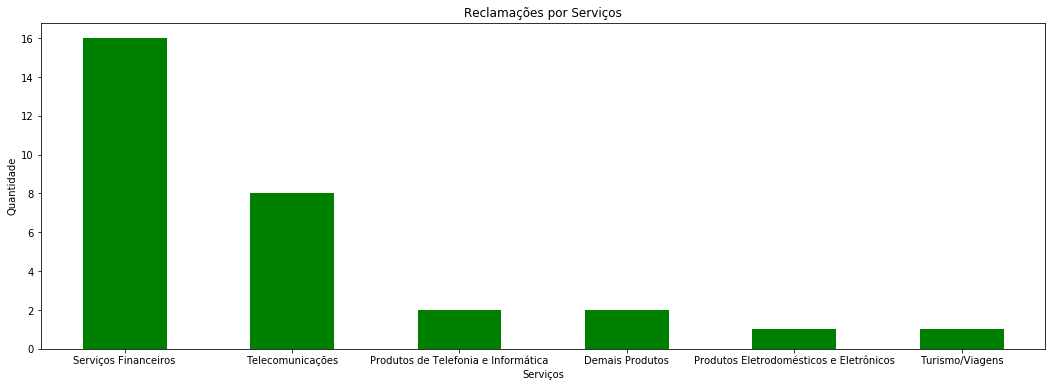

In [13]:
tabela1 = pd.read_csv('dataset_gerados/qualitativos/amostra_aleatoria.csv',encoding='utf-8')
COLUNA = 'Servico'
TITULO_GRAFICO = 'Reclamações por Serviços'
XLABEL = 'Serviços'
YLABEL = 'Quantidade'

grafico_coluna = tabela1[COLUNA].value_counts().plot(kind='bar',figsize=(18,6), grid = False, rot = 0, color='green')
plt.title(TITULO_GRAFICO)
plt.xlabel(XLABEL)
plt.ylabel(YLABEL)
#plt.show()

### Gráfico de Barra

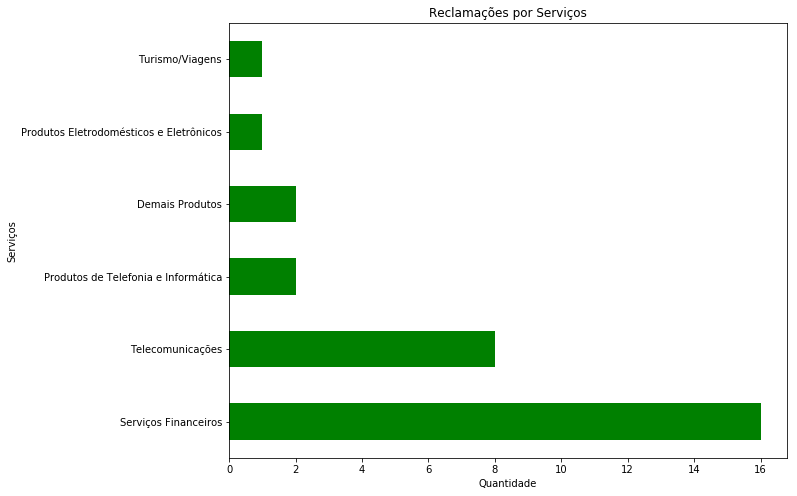

In [14]:
TITULO_GRAFICO = 'Reclamações por Serviços'
XLABEL = 'Quantidade'
YLABEL = 'Serviços'

grafico_barra = tabela1[COLUNA].value_counts().plot(kind='barh',figsize=(10,8), grid = False, rot = 0, color='green')
plt.title(TITULO_GRAFICO)
plt.xlabel(XLABEL)
plt.ylabel(YLABEL)
plt.show()

### Gráfico de Pizza

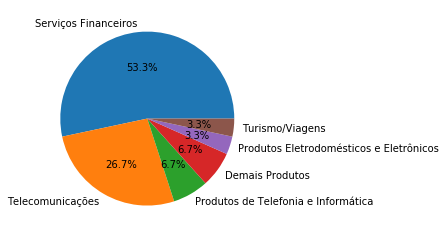

In [20]:
from matplotlib.gridspec import GridSpec

grafico_pizza_df = pd.read_csv('dataset_gerados/qualitativos/amostra_aleatoria_frequencia.csv',sep=',',encoding='utf-8')
COLUNA1 = 'Serviço'
COLUNA2 = 'Quantidade'

the_grid = GridSpec(1, 1)

labels = grafico_pizza_df[COLUNA1]
fracs = grafico_pizza_df[COLUNA2]

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%')
#plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

plt.show()

### Gráfico Polar

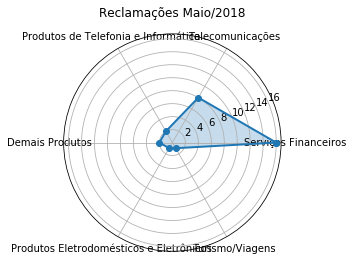

In [23]:
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
import numpy as np
import seaborn as sns

TITULO_GRAFICO_POLAR = "Reclamações Maio/2018"
COLUNA1 = 'Serviço'
COLUNA2 = 'Quantidade'

#df2=pd.read_csv("bases/aulas/tabela_frequencia_estados.csv")

# Pegando a linha com os labels
labels = list(df[COLUNA1])

# Pegando os valores correspondentes aos labels
stats = list(df[COLUNA2])

# Gerando os angulos
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)# Set the angle

# Usado para criar uma area fechada para o gráfico polar
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)   # Definindo o eixo axial
ax.plot(angles, stats, 'o-', linewidth=2)  # Desenhando o gráfico
ax.fill(angles, stats, alpha=0.25)  # Procurar a area
ax.set_thetagrids(angles * 180/np.pi, labels)  # Definindo o rótulo para cada eixo do gráfico
ax.set_title(TITULO_GRAFICO_POLAR) # Titulo do gráfico
#ax.set_title([df.loc[386,"Name"]])  # Seta o item name com o titulo

#ax.set_rlim(0,250) # Setar valor maximo para valores dos circulos
ax.grid(True)